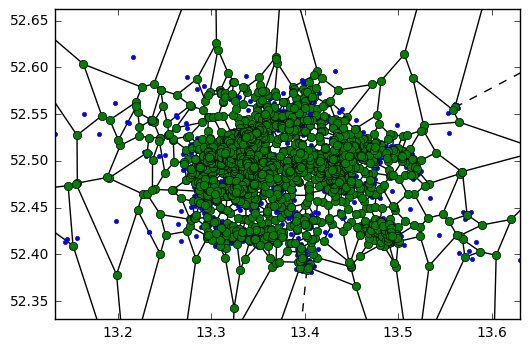

In [26]:
%matplotlib inline

import json

import numpy
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

with open('/Users/knut/projects/pumpen-voronoi/data.json') as infile:
    data = json.load(infile)
    data['elements'] = data['elements']
points = [[element['lon'], element['lat']] for element in data['elements']]
lats = [element['lat'] for element in data['elements']]#   
lons = [element['lon'] for element in data['elements']]

vor = Voronoi(points)
print vor

voronoi_plot_2d(vor)
plt.axis('equal')
plt.ylim(min(lats), max(lats))
plt.xlim(min(lons), max(lons))
plt.show()

In [29]:
from geojson import Feature, Point, FeatureCollection,LineString, Polygon
import geojson
the_lines = []
for point in vor.ridge_vertices:
    the_lines.append(vor.vertices[point])
    
lines = []
for region in vor.regions:
    if -1 in region:
        continue
    points = [tuple(vor.vertices[index]) for index in region]
    line = Polygon([points])
    lines.append(line)

# points = []
# for point in vor.points:
#     point = Point(tuple(point))
#     points.append(point)
    
combined = lines #+ points    
collection = FeatureCollection([Feature(geometry=element) for element in combined])
with open("/Users/knut/projects/pumpen-voronoi/voronoi.geojson", "w") as outfile:
    geojson.dump(collection, outfile, indent=2)

In [19]:
for region in vor.regions:
    points = [tuple(vor.vertices[index]) for index in region]
    print points

[(13.303944110336806, 52.506339532130191), (13.414468505962953, 52.527323636966727)]
[(13.385635654497401, 52.455131942143119), (13.494898948565659, 52.083131610387049), (13.303944110336806, 52.506339532130191), (13.414468505962953, 52.527323636966727), (13.389122099320291, 52.509443572145685), (13.385693484759793, 52.45980162497758)]
[]
[(13.314774646160291, 52.62577033635278), (13.303944110336806, 52.506339532130191), (13.414468505962953, 52.527323636966727), (13.389122099320291, 52.509443572145685), (13.362672943854843, 52.543373552528116)]
[(13.300062726632436, 52.463183884680653), (13.288933771807026, 52.485943716693797), (13.206447645271329, 52.477497538168741), (13.289997088501192, 52.459943516829071)]
[(13.288933771807026, 52.485943716693797), (13.298912939179086, 52.488464949718555), (13.295401410586191, 52.504519455147985), (13.303944110336806, 52.506339532130191), (13.206447645271329, 52.477497538168741)]
[(13.289997088501192, 52.459943516829071), (13.494898948565659, 52.083